# Descripción del Proyecto

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

## Paso 4. Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

##### /datasets/project_sql_result_01.csv. contiene los siguientes datos:

- company_name: nombre de la empresa de taxis

- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

##### /datasets/project_sql_result_04.csv. contiene los siguientes datos:

- dropoff_location_name: barrios de Chicago donde finalizaron los viajes

- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

### 4.1 Importar los archivos

In [1]:
# Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Cargar datos
df_companies = pd.read_csv("/datasets/project_sql_result_01.csv")
df_neighborhoods = pd.read_csv("/datasets/project_sql_result_04.csv")

### 4.2 Estudiar los datos que contienen

In [3]:
# Visualización del DataFrame df_companies
df_companies.sample(5)

,company_name,trips_amount
15,Checker Taxi Affiliation,2216
26,Gold Coast Taxi,428
2,Medallion Leasing,10367
18,24 Seven Taxi,1775
30,Setare Inc,230


In [4]:
# Visualización del DataFrame df_neighborhoods
df_neighborhoods.sample(5)

,dropoff_location_name,average_trips
85,Montclare,5.766667
39,Jefferson Park,74.333333
46,Chinatown,52.433333
34,Humboldt Park,97.866667
56,Ukrainian Village,27.600000


### 4.3 Asegurar que los tipos de datos sean correctos

In [5]:
# Información del DataFrame df_companies
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# Verificar filas totalmente duplicadas en df_companies
df_companies.duplicated().sum()

0

In [7]:
# Verificar duplicados implícitos en la columna "company_name" con visualización de los valores únicos en dicha columna
df_companies["company_name"].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Association',
       'Checker Taxi Affiliation', 'Blue Diamond',
       'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha Ride Inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada'

In [8]:
# Información del DataFrame df_neighborhoods
df_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
# Verificar filas totalmente duplicadas en df_neighborhoods
df_neighborhoods.duplicated().sum()

0

In [10]:
# Verificar duplicados implícitos en la columna "dropoff_location_name" con visualización de los valores únicos en dicha columna
df_neighborhoods["dropoff_location_name"].unique()

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater', 'West Town', 'Old Town',
       'Rush & Division', 'North Center', 'Lincoln Square', 'Rogers Park',
       'West Ridge', 'Irving Park', 'Hyde Park', 'Avondale',
       'Wicker Park', 'Albany Park', 'United Center', 'Lower West Side',
       'Douglas', 'Portage Park', 'Humboldt Park', 'Norwood Park',
       'Kenwood', 'Bridgeport', 'Armour Square', 'Jefferson Park',
       'Bucktown', 'North Park', 'Garfield Park', 'Mckinley Park',
       'Belmont Cragin', 'Boystown', 'Chinatown', 'Grand Boulevard',
       'Austin', 'Sauganash,Forest Glen', 'South Shore', 'Woodlawn',
       'Little Village', 'Jackson Park', 'North Lawndale', 'Dunning',
       'Ukrainian Village', 'Hermosa', 'Englewood'

##### Observaciones:

- El DataFrame df_companies tiene un total de 64 registros y 2 columnas, el nombre de las columnas cumplen con el formato snake_case, el tipo de datos en cada columna es el esperado, no tenemos valores ausentes y no tenemos valores duplicados explícitos ni implícitos en la columna "company_name", por lo que la base de datos está limpia para poder utilizarse con confiabilidad.

- El DataFrame df_neighborhoods tiene un total de 94 registros y 2 columnas, el nombre de las columnas cumplen con el formato snake_case, el tipo de datos en cada columna es el esperado, no tenemos valores ausentes y no tenemos valores duplicados explícitos ni implícitos en la columna "dropoff_location_name", por lo que la base de datos está limpia para poder utilizarse con confiabilidad.

### 4.4 Identificar los 10 principales barrios en términos de finalización del recorrido

In [11]:
# Sacar Top 10 de los principales barrios ordenándolos de mayor a menor "average_trip" con sort_values
top_10_neighborhoods = (df_neighborhoods.sort_values(by="average_trips", ascending=False).head(10))

# Visualización del Top 10
print("Top 10 Principales Barrios por Finalización de Viajes:")
print()
print(top_10_neighborhoods)

Top 10 Principales Barrios por Finalización de Viajes:

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


### 4.5 Gráfico de empresas de taxis y números de viajes

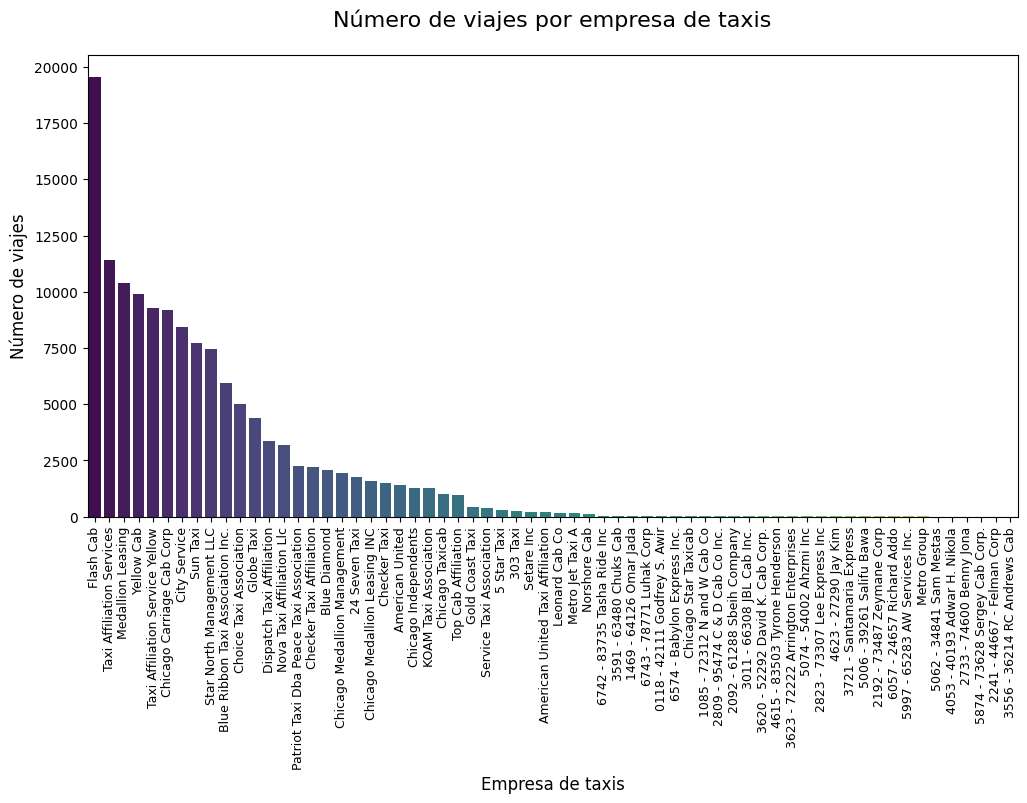

In [12]:
# Visualización de gráfico de empresas de taxis vs números de viajes
plt.figure(figsize=(12, 6))

plot = sns.barplot(
    x="company_name", 
    y="trips_amount", 
    data=df_companies, 
    palette="viridis")

# Ajustes de etiquetas para la legibilidad
plt.xticks(rotation=90, fontsize=9) # Rotación de 90 grados y letra pequeña
plt.title("Número de viajes por empresa de taxis", fontsize=16, pad=20)
plt.xlabel("Empresa de taxis", fontsize=12)
plt.ylabel("Número de viajes", fontsize=12)
plt.show()

### 4.5 Gráfico de Top 10 de barrios por finalización de viajes

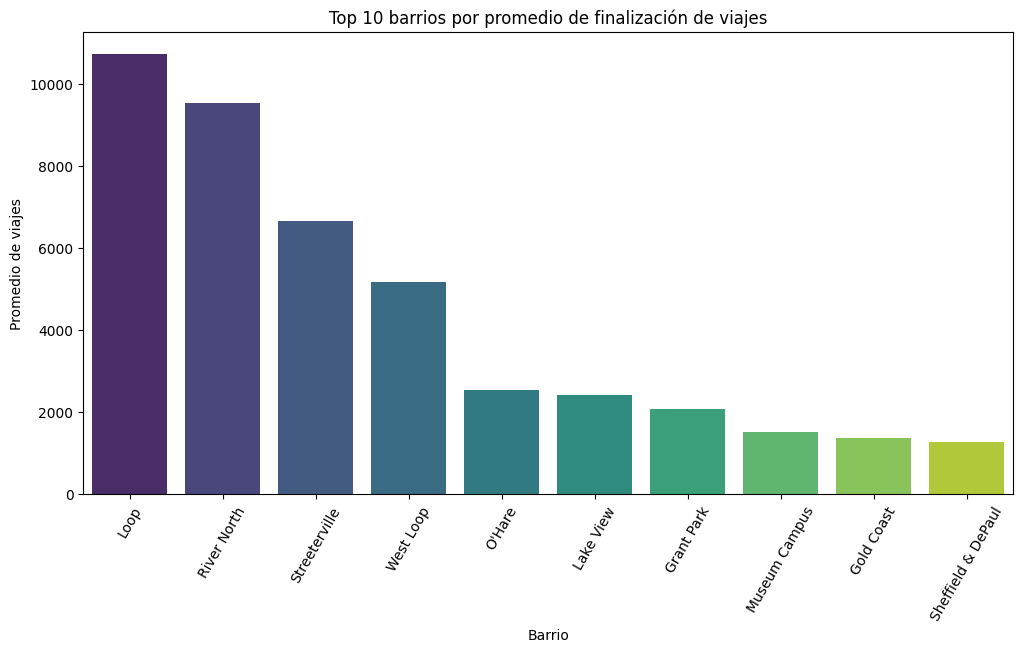

In [13]:
# Visualización de gráfico de Top 10 de barios por finalización de viajes
plt.figure(figsize=(12, 6))

plot = sns.barplot(
    x="dropoff_location_name", 
    y="average_trips", 
    data=top_10_neighborhoods, 
    palette="viridis")

plt.xticks(rotation=60)
plt.title("Top 10 barrios por promedio de finalización de viajes")
plt.xlabel("Barrio")
plt.ylabel("Promedio de viajes")
plt.show()

### 4.6 Conclusiones del análisis exploratorio de datos

##### Gráfico Número de viajes por empresas de Taxis

Es este gráfico se puede observar que unas pocas empresas concentran la mayor parte de los viajes. La empresa Flash Cab domina el mercado con alrededor de 19,500 viajes el 15 y 16 de noviembre del 2025, seguida de las empresas Taxi Affiliation Services con alrededor de 11,500 viajes y Medallion Leasing con alrededor de 10,500 viajes. Esto nos indica que hay una alta concentración del mercado en algunas compañias, lo que representa un reto competitivo para Zuber.

##### Gráfico Top 10 Barrios con promedio de finalización de viajes

Este gráfico muestra que los viajes tienden a finalizar con mayor frecuencia en zonas específicas. Los 5 barrios que utilizan mayormente el servicio son Loop (por encima de los 10 mil viajes promedio los días 15 y 16 de noviembre del 2017), River North (alrededor de 9500 viajes promedio) y Streeterville (por encima de los 6500 viajes promedio), West Loop (cerca de los 5,500 viajes promedio) y O'Hare (alrededor de 2500 viajes promedio); esto podría deberse a que en esos barrios probablemente se concentran centros de trabajo, zonas comerciales y puntos turísticos. Para Zuber, estos barrios son zonas clave donde se podrían posicionar sus conductores.

## Paso 5. Prueba de hipótesis: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

### 5.1 Importación y preparación de los datos

In [14]:
# Importación de datos
df = pd.read_csv("/datasets/project_sql_result_07.csv")

In [15]:
# Visualización de datos
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
887,2017-11-18 09:00:00,Bad,1497.0
718,2017-11-04 20:00:00,Good,2220.0
631,2017-11-18 12:00:00,Bad,2877.0
1015,2017-11-11 13:00:00,Good,2449.0
518,2017-11-04 17:00:00,Bad,2580.0
122,2017-11-11 06:00:00,Good,1218.0
268,2017-11-11 04:00:00,Good,1304.0
242,2017-11-11 11:00:00,Good,2100.0
949,2017-11-11 13:00:00,Good,2220.0
899,2017-11-04 14:00:00,Good,3480.0


In [16]:
# Conversión de dato tipo string en "start_ts" a fecha
df["start_ts"] = pd.to_datetime(df["start_ts"])

# Filtrar viajes los días sábado (lunes = 0, domingo = 6), día 5 de la semana
df["weekday"] = df["start_ts"].dt.weekday
df_saturday = df[df["weekday"] == 5]
df_saturday

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


In [17]:
# Filtrar por condiciones climáticas y guardar los datos en nuevas variables
rainy_saturday = df_saturday[df_saturday["weather_conditions"] == "Bad"]["duration_seconds"]
good_saturday = df_saturday[df_saturday["weather_conditions"] == "Good"]["duration_seconds"]

print("Tabla Sábados Lluviosos:")
print(rainy_saturday)
print()
print("Tabla Sábados con Buen Clima:")
print(good_saturday)

Tabla Sábados Lluviosos:
6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

Tabla Sábados con Buen Clima:
0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64


### 5.2 Análisis Estadístico

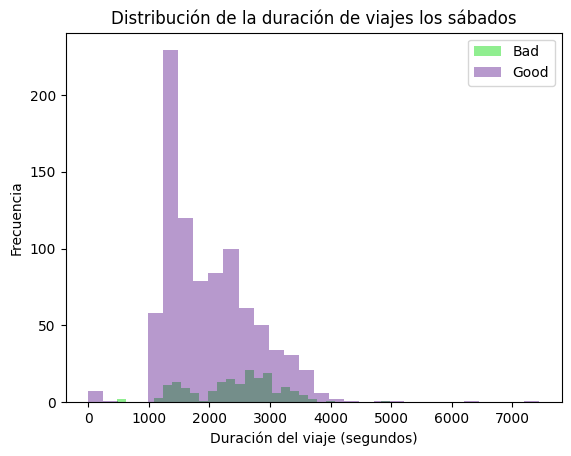

In [18]:
# Gráfico de Distribución para evaluar normalidad y sesgos en los datos
plt.figure()
plt.hist(rainy_saturday, bins=30, label='Bad', color = "lightgreen")
plt.hist(good_saturday, bins=30, alpha=0.4, label='Good', color = "indigo")
plt.xlabel("Duración del viaje (segundos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la duración de viajes los sábados")
plt.legend()
plt.show()

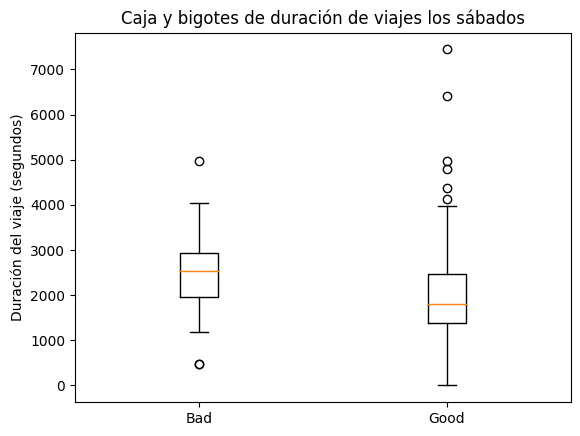

In [19]:
# Gráfico de Caja y Bigotes para comparar medianas, detectar outliers y visualizar dispersión
plt.figure()
plt.boxplot([rainy_saturday, good_saturday], labels=["Bad", "Good"])
plt.ylabel("Duración del viaje (segundos)")
plt.title("Caja y bigotes de duración de viajes los sábados")
plt.show()

In [20]:
# Visualizar los datos estadísticos
weather_saturdays = pd.DataFrame({"Sábados Lluviosos": rainy_saturday.describe(),
                                  "Sábados con Buen Clima": good_saturday.describe()})

print(weather_saturdays)
print()
print("Sábados Lluviosos")
print(f"Varianza: {rainy_saturday.var()} / Mediana: {rainy_saturday.median()}")
print()
print("Sábados con Buen Clima")
print(f"Varianza: {good_saturday.var()} / Mediana: {good_saturday.median()}")

       Sábados Lluviosos  Sábados con Buen Clima
count         180.000000              888.000000
mean         2427.205556             1999.675676
std           721.314138              759.198268
min           480.000000                0.000000
25%          1962.000000             1389.750000
50%          2540.000000             1800.000000
75%          2928.000000             2460.000000
max          4980.000000             7440.000000

Sábados Lluviosos
Varianza: 520294.086002483 / Mediana: 2540.0

Sábados con Buen Clima
Varianza: 576382.009689509 / Mediana: 1800.0


##### Observaciones y Conclusiones

- Gráfico de distribución (histograma):

Se observa que ambas distribuciones presentan asimetría positiva (cola larga hacia la derecha) y que no siguen una forma normal. Los sábados con buen clima muestran una dispersión mayor, con valores extremos muy altos. Los sábados lluviosos concentran más viajes en duraciones altas.

- Gráfico de caja y bigotes:

La mediana de los sábados lluviosos (aprox. 2,540 s) es claramente mayor que la de los sábados con buen clima (alrededor de 1,800 s). Existen outliers en ambos grupos, especialmente en los sábados con buen clima. La dispersión es alta y no homogénea.

- Análisis estadístico:

Las medianas son significativamente diferentes, la mediana es más robusta ante outliers, las varianzas no son iguales y los tamaños de muestra son muy distintos.

Tendencia Central: El promedio de viaje en sábados lluviosos (2427s) es superior al de los sábados con buen clima (1999s). La mediana refuerza que en días lluviosos la mitad de los viajes superan los 2540 segundos, mientras que en días buenos esa mitad apenas llega a los 1800 segundos.

Dispersión y Variabilidad: La varianza es ligeramente mayor en los sábados con buen clima, pero lo más curioso es el valor mínimo de 0 en el buen clima (posible error de medición o viaje cancelado) y un máximo de 7,440, lo que sugiere que el buen clima tiene más valores atípicos (outliers).

Volumen de Datos: Se tiene una muestra mucho más grande para el clima bueno (888) que para el lluvioso (180). Esta desigualdad en el tamaño de la muestra.


- Elección del test a utilizar para la prueba de hipótesis:

Las distribuciones de la duración de los viajes para ambos grupos no son normales y presentan sesgo y colas largas. Esto indica que no se cumplen los supuestos de normalidad necesarios para aplicar pruebas paramétricas como el t-test y t de Welch. El diagrama de caja muestra diferencias claras en las medianas entre los grupos y la presencia de múltiples valores atípicos, lo que refuerza que las distribuciones no son normales y que una prueba basada en medianas es más adecuada. Por lo anterior, se decide que La prueba adecuada para este análisis es la de Mann-Whitney U ya que ésta no es una prueba paramétrica, compara medianas, no requiere normalidad, es robusta ante otliers y funciona bien con tamaños de muestras diferentes.


Conclusión: 

Aunque la prueba t de Welch permite comparar medias con varianzas distintas, sigue siendo una prueba paramétrica que asume normalidad en los datos. A partir del análisis exploratorio (histogramas y diagramas de caja), se observó que las distribuciones de duración de los viajes presentan asimetría, colas largas y numerosos valores atípicos. Por esta razón, se optó por utilizar la prueba no paramétrica de Mann–Whitney U, que no requiere el supuesto de normalidad y es más robusta frente a este tipo de distribuciones.

### 5.3 Planteamiento de hipótesis. La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

H₀ (hipótesis nula): La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos es igual a la duración promedio de los viajes los sábados con buen clima.

H₁ (hipótesis alternativa): La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos es diferente a la duración promedio de los viajes los sábados con buen clima.

Se utiliza un nivel de significancia alpha = 0.05

In [21]:
# Planteamiento de la hipótesis
print("H₀ (hipótesis nula): La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos es igual a la duración promedio de los viajes los sábados con buen clima")
print()
print("H₁ (hipótesis alternativa): La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos es diferente a la duración promedio de los viajes los sábados con buen clima")
print()

# Se establece alpha en 5%, si el valor de p (probabilidad) es menor que este porcentaje se rechazará la hipótesis nula
alpha = 0.05

# Ejecución de prueba Mann-Whitney U utilizando alternative = "two-sided" ya que estamos probando que existe una diferencia sin importar la dirección
results = stats.mannwhitneyu(rainy_saturday, good_saturday, alternative="two-sided")

print("Estadístico U:", results.statistic)
print("p-value:", results.pvalue)
print()

# Se realiza el comparativo del valor p con el umbral del 5% y se valida o descarta la hipótesis nula, se realizará con condicionales
if results.pvalue < alpha:
    print("Resultado: Rechazamos la hipótesis nula, se concluye que en los días sbábado la duración promedio de los viajes con lluvia es significativamente diferente a la duración en días buenos desde Loop hasta O`Hare")
else:
    print("Resultado: No podemos rechazar la hipótesis nula, no hay evidencia significativa que en los días sábado la duración promedio de los viajes con lluvia es diferente a la duración en días buenos desde Loop hasta O'Hare")

H₀ (hipótesis nula): La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos es igual a la duración promedio de los viajes los sábados con buen clima

H₁ (hipótesis alternativa): La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare los sábados lluviosos es diferente a la duración promedio de los viajes los sábados con buen clima

Estadístico U: 108193.5
p-value: 6.716538885593458e-14

Resultado: Rechazamos la hipótesis nula, se concluye que en los días sbábado la duración promedio de los viajes con lluvia es significativamente diferente a la duración en días buenos desde Loop hasta O`Hare


##### Observaciones y Conclusiones

El análisis estadístico confirma que las condiciones climáticas influyen en la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados, lo cual respalda la hipótesis planteada.

## CONCLUSIÓN GENERAL

El análisis realizado sobre el mercado de taxis en Chicago permitió identificar patrones clave en la distribución de los viajes, el comportamiento de la demanda por zonas y el impacto de factores externos, como las condiciones climáticas, en la duración de los trayectos. Estos hallazgos aportan información relevante para la toma de decisiones estratégicas de Zuber en su proceso de entrada al mercado.

El gráfico del número de viajes por empresa de taxis evidencia una alta concentración del mercado, donde unas pocas compañías dominan la mayor parte de los viajes. Flash Cab lidera claramente con aproximadamente 19,500 viajes durante los días 15 y 16 de noviembre de 2017, seguida por Taxi Affiliation Services (alrededor de 11,500 viajes) y Medallion Leasing (alrededor de 10,500 viajes). Esta concentración indica un entorno altamente competitivo, en el cual Zuber enfrentará el reto de competir con empresas consolidadas que ya cuentan con una base sólida de usuarios y conductores.

Por otro lado, el gráfico de los 10 principales barrios por promedio de finalización de viajes muestra que la demanda no se distribuye de manera uniforme entre las zonas de la ciudad. Barrios como Loop, River North, Streeterville, West Loop y O’Hare concentran la mayor cantidad de viajes finalizados, lo cual sugiere que estas áreas funcionan como polos de atracción debido a la presencia de centros de trabajo, zonas comerciales, áreas turísticas y nodos de transporte. Para Zuber, estos barrios representan zonas estratégicas donde enfocar la disponibilidad de conductores para maximizar la captación de viajes y mejorar los tiempos de respuesta.

El análisis exploratorio de los datos de viajes desde el Loop hasta el Aeropuerto Internacional O’Hare permitió identificar diferencias claras en la duración de los trayectos según las condiciones climáticas de los sábados. Los histogramas mostraron que, en días lluviosos, la duración de los viajes tiende a ser mayor y se desplaza hacia valores más altos en comparación con los sábados con buen clima. Ambas distribuciones presentaron asimetría positiva y valores atípicos, lo que indica que los datos no siguen una distribución normal.

El diagrama de caja y bigotes confirmó estos patrones al mostrar una mediana significativamente mayor en sábados lluviosos (2540 segundos) frente a los sábados con buen clima (1,800 segundos), así como una mayor dispersión en los tiempos de viaje. La estadística descriptiva reforzó estos resultados, ya que la duración promedio de los viajes en condiciones lluviosas (alrededor de 2,427 segundos) superó a la observada en condiciones favorables (alrededor de 2,000 segundos), lo que sugiere que la lluvia influye directamente en el tráfico y la congestión vial.

Debido a la falta de normalidad, la presencia de asimetría y múltiples valores atípicos, se optó por utilizar una prueba no paramétrica de Mann–Whitney U, adecuada para comparar dos muestras independientes sin asumir una distribución normal. Al aplicar esta prueba con un nivel de significación del 5% (alpha = 0.05), se obtuvo un valor p menor al nivel de significancia (6.71E-14), lo que llevó a rechazar la hipótesis nula. En consecuencia, se concluye que la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O’Hare cambia de manera estadísticamente significativa en los sábados lluviosos.

En conjunto, los resultados indican que el mercado de taxis en Chicago está dominado por pocas empresas, que la demanda se concentra en zonas específicas de la ciudad y que las condiciones climáticas influyen de forma significativa en la duración de los viajes. Identificar a las empresas líderes, los barrios con mayor demanda y los factores externos que afectan la operación permite a Zuber diseñar una estrategia de entrada al mercado más informada, optimizando la asignación de conductores, la planeación de tiempos de viaje y la experiencia del usuario.